A program that reads and processes images for a Support Vector Machine (SVM) to classify as images as good or bad.

In [1]:
import numpy as np
import pandas as pd
import os
from glob import glob
import matplotlib.pyplot as plt
%matplotlib inline
import cv2

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn import linear_model
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

import pickle

C:\Users\micha\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
def read_images(paths): 
    """
    Reads in all images and returns list of picture id numbers based on the image name
    
    Parameters
    ----------
    paths : string
    
    Returns
    ----------
    images and list of id numbers
    """
    import numpy as np
    # Get list of images
    images = (glob(paths + '*.jpg'))
    # Read images from list
    data = [cv2.cvtColor(cv2.imread(file),cv2.COLOR_BGR2GRAY) for file in images]
    data = np.array(data)
    data = data.reshape((len(data),-1))
    
    print(data.shape)
    return data

In [13]:
def svm_layers(X_train, y_train, X_test, y_test):
    """
    Builds layers of Support Vector Machine
    Fits model to the data
    
    Parameters
    ------------
    X_train = array
    X_test = array
    y_train = data frame or array
    y_test = data frame or array
       
    Returns
    ------------
    model metrics evaluation
    """
    
    model = svm.SVC(gamma=0.001)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print(classification_report(y_test,y_pred))
    accuracy = accuracy_score(y_test,y_pred)
       
    np.set_printoptions(precision=2)

    # Plot non-normalized confusion matrix
    plot_confusion_matrix(y_test, y_pred, classes=class_labels,
                      title='Confusion matrix, without normalization')

    # Plot normalized confusion matrix
    plot_confusion_matrix(y_test, y_pred, classes=class_labels, normalize=True,
                      title='Normalized confusion matrix')

    plt.show()
    return model,accuracy

In [4]:
def supervised_models(model, X_train, y_train):
    """
    Fits supervised models to data and returns metrics
    
    Parameters
    ------------
    model = supervised learning model
    X_train = array
    y_train = data frame or array
       
    Returns
    ------------
    model metrics evaluation
    """
    
    model = model
    model.fit(X_train, y_train)
    probabilities = model.predict_proba(X_test)[:,1]
    y_pred = model.predict(X_test)
    
    print(classification_report(y_test,y_pred))

    return model, probabilities, y_pred

In [5]:
df_train = pd.read_csv('/Users/micha/ea-applications/data/test-images.csv')

paths = '/Users/micha/ea-applications/data/training-test-images/Thermal/mytest/*MEDIA/'

train_images = read_images(paths)

y = np.array(df_train['Label'])

y = df_train['Label'].values

X_train, X_test, y_train, y_test = train_test_split(train_images, y, random_state=42, test_size=0.4)

print(df_train.head())
print(X_train.shape)
print(y_train)

(424, 327680)
  Image Date     MEDIA Image_Name  Label Unnamed: 4
0  2/16/2019  100MEDIA   DJI_0001      2        NaN
1  2/16/2019  100MEDIA   DJI_0002      2        NaN
2  2/16/2019  100MEDIA   DJI_0003      2        NaN
3  2/16/2019  100MEDIA   DJI_0004      2        NaN
4  2/16/2019  100MEDIA   DJI_0005      2        NaN
(254, 327680)
[0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 2 2 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 2 0 0 0
 0 0 3 0 2 0 1 0 0 1 3 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 3
 1 0 0 0 1 3 0 0 2 3 0 0 0 0 0 0 0 0 0 1 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 2 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 2 0 3 0 0 0 0 3 0 0
 0 0 0 2 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 3 3 0 2 0 0 0 0 2 0 0 0
 3 3 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 2 0 0 0 0 0 0 2 2 0 0 0 0 0 0]


In [6]:
# Run svm model
model = svm.SVC(gamma=0.001)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_labels,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_labels, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

             precision    recall  f1-score   support

          0       0.80      1.00      0.89       136
          1       0.00      0.00      0.00         1
          2       0.00      0.00      0.00        15
          3       0.00      0.00      0.00        18

avg / total       0.64      0.80      0.71       170

0.8


C:\Users\micha\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [7]:
y_test[y_test==1]

array([1], dtype=int64)

In [10]:
class_labels=['Good', 'Blacked-Out', 'Saturated', 'Blurry']

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    #classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

In [16]:
# Run logistic regression model
model = linear_model.LogisticRegression()
model_logistic, probabilities, y_pred = supervised_models(model, X_train, y_train)
print(probabilities)

             precision    recall  f1-score   support

          0       0.84      0.81      0.82       136
          1       0.00      0.00      0.00         1
          2       0.21      0.40      0.27        15
          3       0.50      0.06      0.10        18

avg / total       0.74      0.69      0.69       170

[6.18e-08 1.48e-15 1.05e-01 1.49e-02 1.03e-09 3.33e-06 2.31e-05 1.48e-06
 6.67e-15 4.99e-14 8.47e-09 2.77e-01 8.32e-16 6.75e-07 7.57e-17 3.56e-11
 2.49e-12 1.10e-26 3.15e-12 7.78e-18 8.70e-09 1.36e-10 3.47e-05 3.73e-22
 6.74e-09 1.03e-01 6.51e-07 1.07e-02 5.28e-04 2.68e-04 6.90e-05 8.27e-01
 1.57e-16 1.57e-13 1.46e-13 5.26e-12 1.99e-21 2.47e-11 3.25e-06 4.35e-14
 2.73e-08 4.04e-08 2.62e-16 2.60e-10 4.11e-05 2.79e-13 7.00e-20 5.28e-04
 1.09e-21 2.33e-13 5.84e-03 8.60e-01 4.32e-10 2.30e-07 2.72e-11 9.80e-04
 5.73e-05 5.15e-05 7.81e-01 4.74e-07 4.13e-18 2.41e-06 9.08e-15 2.25e-05
 7.52e-04 8.54e-09 2.18e-06 5.21e-06 9.19e-05 8.83e-09 6.49e-03 4.29e-07
 1.07e-10 5.03e-10 5.1

In [17]:
print(confusion_matrix(y_test, y_pred))

[[110   6  19   1]
 [  1   0   0   0]
 [  9   0   6   0]
 [ 11   2   4   1]]


Confusion matrix, without normalization
[[110   6  19   1]
 [  1   0   0   0]
 [  9   0   6   0]
 [ 11   2   4   1]]
Normalized confusion matrix
[[0.81 0.04 0.14 0.01]
 [1.   0.   0.   0.  ]
 [0.6  0.   0.4  0.  ]
 [0.61 0.11 0.22 0.06]]


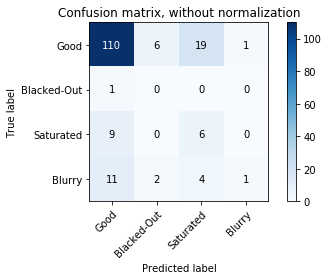

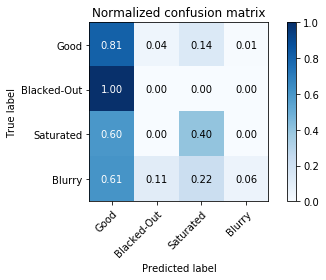

In [18]:
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_labels,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_labels, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [ ]:
# Run random forest classifier
model = RandomForestClassifier()
model_logistic, probabilities, y_pred = supervised_models(model, X_train, y_train)
print(probabilities)

In [ ]:
print(confusion_matrix(y_test, y_pred))

In [ ]:
# Run gradient boosting classifier
model = GradientBoostingClassifier()
model_boosting, probabilities, y_pred = supervised_models(model, X_train, y_train)
print(probabilities)

In [ ]:
print(confusion_matrix(y_test, y_pred))

In [ ]:
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_labels,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_labels, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [ ]:
# save the model to disk
filename = 'finalized_model.sav'
pickle.dump(model_boosting, open(filename, 'wb'))